Metodi Numerici in Python (scipy)
==================================

Introduzione
------------

Il linguaggio Python di base (incluse le librerie standard) fornisce strumenti sufficienti per completare progetti di ricerca computazionali. Tuttavia, esistono librerie Python dedicate (scritte da soggetti diversi) che forniscono funzionalità estese che

-   forniscono strumenti numerici per automatizzare operazioni ricorrenti

-   sono semplici da usare

-   sono più efficienti in termini di tempo di CPU e di esigenze di memoria degli strumentirequirements than using the code Python functionality alone.

Citiamo tre librerie in particolare:

-   Il modulo `numpy` introdotto in 07_numpy.

-   Il modulo `matplotlib` introdotto in 08_plots.

-   Il modulo `scipy` (SCIentific PYthon) che fornisce un gran numero di algoritmi numerici di cui parliamo in questo notebook.

Molti degli algoritmi numerici resi disponibili da `scipy` e `numpy` sono forniti da da librerie compilate, di solida tradizione, che spesso sono scritte in Fortran o C. Girano quindi molto più velocemente di codice scritto in puro Python (che è interpretato). Generalmente, un codice compilato è due ordini di grandezza più veloce di un codice in puro Python.

Come al solito, si può utilizzare la funzione `help` su ciascuno dei metodi numerici per accedere alla documentazione.

SciPy
-----

`Scipy` è basata su `numpy`. Nella [documentazione di SciPy](https://docs.scipy.org/doc/scipy/reference/api.html) viene raccomandato di importare le due librerie separatamente.

In [1]:
import numpy as np
import scipy

La libreria `scipy` fornisce informazioni sulla propria struttura atrraverso il comando `help`:

```python
help(scipy)
```

L'output è molto lungo. Ne mostriamo solo una parte:

    stats       --- Statistical Functions [*]
    sparse      --- Sparse matrix [*]
    lib         --- Python wrappers to external libraries [*]
    linalg      --- Linear algebra routines [*]
    signal      --- Signal Processing Tools [*]
    misc        --- Various utilities that don't have another home.
    interpolate --- Interpolation Tools [*]
    optimize    --- Optimization Tools [*]
    cluster     --- Vector Quantization / Kmeans [*]
    fftpack     --- Discrete Fourier Transform algorithms [*]
    io          --- Data input and output [*]
    integrate   --- Integration routines [*]
    lib.lapack  --- Wrappers to LAPACK library [*]
    special     --- Special Functions [*]
    lib.blas    --- Wrappers to BLAS library [*]
      [*] - using a package requires explicit import (see pkgload)

Per trovare un algoritmo per integrare una funzione, si può esplorare la libreria `integrate`:

```python
import scipy.integrate

scipy.integrate?
```

produces:

```text
=============================================
Integration and ODEs (:mod:`scipy.integrate`)
=============================================

.. currentmodule:: scipy.integrate

Integrating functions, given function object
============================================

.. autosummary::
   :toctree: generated/

   quad          -- General purpose integration
   dblquad       -- General purpose double integration
   tplquad       -- General purpose triple integration
   nquad         -- General purpose n-dimensional integration
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
   quadrature    -- Integrate with given tolerance using Gaussian quadrature
   romberg       -- Integrate func using Romberg integration
   quad_explain  -- Print information for use of quad
   newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
   IntegrationWarning -- Warning on issues during integration

Integrating functions, given fixed samples
==========================================

.. autosummary::
   :toctree: generated/

   trapz         -- Use trapezoidal rule to compute integral.
   cumtrapz      -- Use trapezoidal rule to cumulatively compute integral.
   simps         -- Use Simpson's rule to compute integral from samples.
   romb          -- Use Romberg Integration to compute integral from
                 -- (2**k + 1) evenly-spaced samples.

.. seealso::

   :mod:`scipy.special` for orthogonal polynomials (special) for Gaussian
   quadrature roots and weights for other weighting factors and regions.

Integrators of ODE systems
==========================

.. autosummary::
   :toctree: generated/

   odeint        -- General integration of ordinary differential equations.
   ode           -- Integrate ODE using VODE and ZVODE routines.
   complex_ode   -- Convert a complex-valued ODE to real-valued and integrate.
```

Alcuni esempi che mostrano come usare gli algoritmi forniti da `scipy`.

Integrazione numerica
---------------------

<img src="../Images/integral_comic_strip.png" width="900" align="left"/>
(Svein Linge, Hans Petter Langtangen - Programming for Computations)<br>

<p><br><\p>
<p> <\p>

Scientific Python fornisce diverse routines di integrazione. Uno strumento di uso generale per calcolare integrali *I* del tipo

$$I=\int_a^b f(x) \mathrm{d} x$$

è la funzione `quad()` del modulo `scipy.integrate`.

Prende in input la funzione *f(x)* da integrare (l'“integrando”) e gli estremi inferiore e superiore *a* and *b*. 
Restituisce due valori, (in una tuple): il primo è il risultato dell'integrale mentre il secondo è una stima dell'errore numerico del risultato.

In [ ]:
from scipy import integrate
help(integrate.quad)

Ecco un esempio:
$$I=\int_{-2}^{2} e^{\cos(-2 \pi x)} \,\mathrm{d} x$$

In [44]:
from math import cos, exp, pi
from scipy.integrate import quad

# funzione da integrare
def f(x):
    return exp(cos(-2 * x * pi))

# chiamata a quad
res, err = quad(f, -2, 2)

print(f"The numerical result is {res:f} (+-{err:g})")

The numerical result is 5.064264 (+-1.55117e-11)


Si noti che `quad()` può prendere come parametri opzionali `epsabs` e `epsrel` per aumentare o diminuire l'accuratezza del calcolo (Usate `help(quad)` per maggiori informazioni). I valori di default sono `epsabs=1.5e-8` and `epsrel=1.5e-8`. Per il prossimo esercizio, i valori di default sono sufficienti.

### Integrazione con metodo dei trapezi

<img src="../Images/Trapezoid_Integration.png" width="400" align="left"/>

In [11]:
# https://www.math.ubc.ca/~pwalls/math-python/integration/trapezoid-rule/

import numpy as np

def my_trapz(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    The trapezoid rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/2) \sum_{k=1}^N (f(x_k) + f(x_{k-1}))
    where x_k = a + k*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.

    Examples
    --------
    >>> trapz(np.sin,0,np.pi/2,1000)
    0.9999997943832332
    '''
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

In [16]:
def vf(x):
    return np.exp(np.cos(-2 * x * np.pi))

res1 = my_trapz(vf,-2,2)
print(f"The numerical result is {res1:f}")

The numerical result is 5.064264


### Esercizio: integrare una funzione

1.  Usando la funzione di scipy `quad` , scrivete un programmma che calcola numericamente il seguente integrale: $I = \int
_0^1\cos(2\pi x) dx$.

2.  Calcolate analiticamente l'integrale con `sympy` e confrontate i due risultati.

3.  Perchè è importante avere una stima dell'accuratezza o errore dell'integrale numerico?

### Esercizio: fare il grafico prima di integrare

È bene fare il grafico della funzione integranda per controllarne il comportamento prima di cercare di integrarla. Singolarità (per esempio valori di $x$ in cui $f(x)$ tende a più o meno infinito) oppure altri comportamenti irregolari, come quello di $f(x)=\sin(\frac{1}{x}$) nell'intorno di $x = 0$, sono estremamente difficili e talvolta semplicemente impossibili da trattare numericamente.

1.  Scrivete una funzione chiamata `plotquad` che prende gli stessi argomenti del comando `quad`(cioè $f$, $a$ e $b$) e che 
- (i) genera un plot dell'integrando $f(x)$
- (ii) calcola numericamente l'integrale usando la funzione `quad`, ritornando lo stesso set di valori di `quad`.

Risolvere  equazioni  differenziali ordinarie
---------------------------------------

<img src="../Images/FE_comic_strip.png" width="900" align="left"/>
(Svein Linge, Hans Petter Langtangen - Programming for Computations)<br>

<p><br><\p>
<p> <\p>

Per risolvere  equazioni  differenziali ordinarie del tipo
$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = f(y,t)$$

con condizione iniziale $y(t_0)=y_0$, si può usare la  funzione `odeint` di `scipy`. Ecco un esempio (`useodeint.py`) per determinare

$$y(t) \quad \mathrm{for}\quad t\in[0,2]$$
data l'equazione  differenziale:
$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = -2yt \quad \mathrm{with} \quad y(0)=1.$$

Text(0, 0.5, 'y(t)')

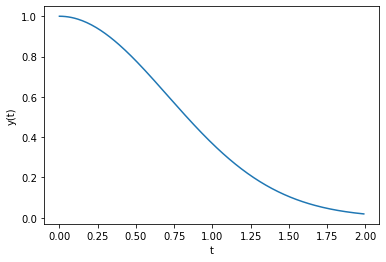

In [9]:
%matplotlib inline
from scipy.integrate import odeint
import numpy as np

def f(y, t):
    """this is the rhs of the ODE to integrate, i.e. dy/dt=f(y,t)"""
    return -2 * y * t

y0 = 1             # initial value
a = 0              # integration limits for t
b = 2

t = np.arange(a, b, 0.01)  # values of t for
                          # which we require
                          # the solution y(t)
y = odeint(f, y0, t)  # actual computation of y(t)

import matplotlib.pyplot as plt         # plotting of results
fig, ax = plt.subplots()
ax.plot(t,y)
ax.set_xlabel('t')
ax.set_ylabel('y(t)')

### Soluzione con il metodo di Eulero

In [4]:
# https://www.math.ubc.ca/~pwalls/math-python/differential-equations/first-order/

def odeEuler(f,y0,t):
    '''Approximate the solution of y'=f(y,t) by Euler's method.

    Parameters
    ----------
    f : function
        Right-hand side of the differential equation y'=f(t,y), y(t_0)=y_0
    y0 : number
        Initial value y(t0)=y0 wher t0 is the entry at index 0 in the array t
    t : array
        1D NumPy array of t values where we approximate y values. Time step
        at each iteration is given by t[n+1] - t[n].

    Returns
    -------
    y : 1D NumPy array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
    '''
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y


In [5]:
y_E = odeEuler(f,y0,t)

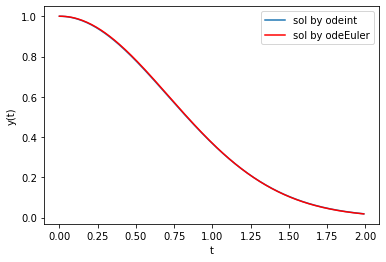

In [11]:
import matplotlib.pyplot as plt         # plotting of results
fig, ax = plt.subplots()
ax.plot(t,y,label='sol by odeint')
ax.plot(t,y_E,c='r',label='sol by odeEuler')
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.legend()

Il comando `odeint` può prendere diversi parametri opzionali per modificare l'errore di default nell'integrazione (e per produrre output addizionale che può essere utile per il debugging). Usate il comando help per farvene un'idea:

```python
help(scipy.integrate.odeint)
```

restituisce:

```
Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t0, ...)
    
    where y can be a vector.
    
    *Note*: The first two arguments of ``func(y, t0, ...)`` are in the
    opposite order of the arguments in the system definition function used
    by the `scipy.integrate.ode` class.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        A sequence of time points for which to solve for y.  The initial
        value point should be the first element of this sequence.
    args : tuple, optional
        Extra arguments to pass to function.
    Dfun : callable(y, t0, ...)
        Gradient (Jacobian) of `func`.
    col_deriv : bool, optional
        True if `Dfun` defines derivatives down columns (faster),
        otherwise `Dfun` should define derivatives across rows.
    full_output : bool, optional
        True if to return a dictionary of optional outputs as the second output
    printmessg : bool, optional
        Whether to print the convergence message
    
    Returns
    -------
    y : array, shape (len(t), len(y0))
        Array containing the value of y for each desired time in t,
        with the initial value `y0` in the first row.
    infodict : dict, only returned if full_output == True
        Dictionary containing additional output information
    
        =======  ============================================================
        key      meaning
        =======  ============================================================
        'hu'     vector of step sizes successfully used for each time step.
        'tcur'   vector with the value of t reached for each time step.
                 (will always be at least as large as the input times).
        'tolsf'  vector of tolerance scale factors, greater than 1.0,
                 computed when a request for too much accuracy was detected.
        'tsw'    value of t at the time of the last method switch
                 (given for each time step)
        'nst'    cumulative number of time steps
        'nfe'    cumulative number of function evaluations for each time step
        'nje'    cumulative number of jacobian evaluations for each time step
        'nqu'    a vector of method orders for each successful step.
        'imxer'  index of the component of largest magnitude in the
                 weighted local error vector (e / ewt) on an error return, -1
                 otherwise.
        'lenrw'  the length of the double work array required.
        'leniw'  the length of integer work array required.
        'mused'  a vector of method indicators for each successful time step:
                 1: adams (nonstiff), 2: bdf (stiff)
        =======  ============================================================
    
    Other Parameters
    ----------------
    ml, mu : int, optional
        If either of these are not None or non-negative, then the
        Jacobian is assumed to be banded.  These give the number of
        lower and upper non-zero diagonals in this banded matrix.
        For the banded case, `Dfun` should return a matrix whose
        rows contain the non-zero bands (starting with the lowest diagonal).
        Thus, the return matrix `jac` from `Dfun` should have shape
        ``(ml + mu + 1, len(y0))`` when ``ml >=0`` or ``mu >=0``.
        The data in `jac` must be stored such that ``jac[i - j + mu, j]``
        holds the derivative of the `i`th equation with respect to the `j`th
        state variable.  If `col_deriv` is True, the transpose of this
        `jac` must be returned.
    rtol, atol : float, optional
        The input parameters `rtol` and `atol` determine the error
        control performed by the solver.  The solver will control the
        vector, e, of estimated local errors in y, according to an
        inequality of the form ``max-norm of (e / ewt) <= 1``,
        where ewt is a vector of positive error weights computed as
        ``ewt = rtol * abs(y) + atol``.
        rtol and atol can be either vectors the same length as y or scalars.
        Defaults to 1.49012e-8.
    tcrit : ndarray, optional
        Vector of critical points (e.g. singularities) where integration
        care should be taken.
    h0 : float, (0: solver-determined), optional
        The step size to be attempted on the first step.
    hmax : float, (0: solver-determined), optional
        The maximum absolute step size allowed.
    hmin : float, (0: solver-determined), optional
        The minimum absolute step size allowed.
    ixpr : bool, optional
        Whether to generate extra printing at method switches.
    mxstep : int, (0: solver-determined), optional
        Maximum number of (internally defined) steps allowed for each
        integration point in t.
    mxhnil : int, (0: solver-determined), optional
        Maximum number of messages printed.
    mxordn : int, (0: solver-determined), optional
        Maximum order to be allowed for the non-stiff (Adams) method.
    mxords : int, (0: solver-determined), optional
        Maximum order to be allowed for the stiff (BDF) method.
    
    See Also
    --------
    ode : a more object-oriented integrator based on VODE.
    quad : for finding the area under a curve.
    
    Examples
    --------
    The second order differential equation for the angle `theta` of a
    pendulum acted on by gravity with friction can be written::
    
        theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0
    
    where `b` and `c` are positive constants, and a prime (') denotes a
    derivative.  To solve this equation with `odeint`, we must first convert
    it to a system of first order equations.  By defining the angular
    velocity ``omega(t) = theta'(t)``, we obtain the system::
    
        theta'(t) = omega(t)
        omega'(t) = -b*omega(t) - c*sin(theta(t))
    
    Let `y` be the vector [`theta`, `omega`].  We implement this system
    in python as:
    
    >>> def pend(y, t, b, c):
    ...     theta, omega = y
    ...     dydt = [omega, -b*omega - c*np.sin(theta)]
    ...     return dydt
    ...
    
    We assume the constants are `b` = 0.25 and `c` = 5.0:
    
    >>> b = 0.25
    >>> c = 5.0
    
    For initial conditions, we assume the pendulum is nearly vertical
    with `theta(0)` = `pi` - 0.1, and it initially at rest, so
    `omega(0)` = 0.  Then the vector of initial conditions is
    
    >>> y0 = [np.pi - 0.1, 0.0]
    
    We generate a solution 101 evenly spaced samples in the interval
    0 <= `t` <= 10.  So our array of times is:
    
    >>> t = np.linspace(0, 10, 101)
    
    Call `odeint` to generate the solution.  To pass the parameters
    `b` and `c` to `pend`, we give them to `odeint` using the `args`
    argument.
    
    >>> from scipy.integrate import odeint
    >>> sol = odeint(pend, y0, t, args=(b, c))
    
    The solution is an array with shape (101, 2).  The first column
    is `theta(t)`, and the second is `omega(t)`.  The following code
    plots both components.
    
    >>> import matplotlib.pyplot as plt
    >>> plt.plot(t, sol[:, 0], 'b', label='theta(t)')
    >>> plt.plot(t, sol[:, 1], 'g', label='omega(t)')
    >>> plt.legend(loc='best')
    >>> plt.xlabel('t')
    >>> plt.grid()
    >>> plt.show()

```

### Esercizio: usare `odeint`

1.  Aprite un nuovo file chiamato `testodeint.py` con un text editor.

2.  Scrivete un programma che calcola la soluzione *y(t)* della ODE seguente, usando l'algoritmo `odeint`,
    $$\frac{\mathrm{d}y}{\mathrm{d}t} =  -\exp(-t)(10\sin(10t)+\cos(10t))$$
     da $t=0$ a $t = 10$. Il valore iniziale è $y(0)=1$.

3.  Mostrate graficamente la soluzione, valutandola nei punti $t=0$, $t=0.01$, $t=0.02$, ..., $t=9.99$, $t=10$.

Aiutino: una parte della soluzione $y(t)$ è presentata nella figura seguente.

<img src="../Images/11_odeintsolution8to10.png" alt="image" style="width:100.0%" />

Ricerca delle radici
------------

Cercare una $x$ tale che
$$f(x)=0$$
si chiama *ricerca delle radici*. Si noti che un problema del tipo $g(x)=h(x)$ può essere riformulato come $f(x)=g(x)−h(x)=0$.

Il modulo `optimize` di `scipy` fornisce diversi strumenti per la ricerca delle radici.


<img src="../Images/comic_root.png" width="900" align="left"/>
(Svein Linge, Hans Petter Langtangen - Programming for Computations)<br>

<p><br><\p>
<p> <\p>
    
### Ricerca delle radici usando il metodo della bisezione 

L'algoritmo `bisect` è (i) robusto e (ii) concettualmente molto semplice (ma lento).

Supponiamo di dover calcolare le radici di $f(x)= x^3 − 2 x^2$. Questa funzione ha una radice (doppia) in $x = 0$ e un'altra fra $x = 1.5$ (dove $f(1.5) = − 1.125$) e $x = 3$ (dove $f(3) = 9$). È facile vedere che questa altra radice si trova in $x = 2$. Ecco il programma che determina la radice numericamente:

In [27]:
from scipy.optimize import bisect

def f(x):
    """returns f(x)=x^3-2x^2. Has roots at
    x=0 (double root) and x=2"""
    return x ** 3 - 2 * x ** 2

# main program starts here
x = bisect(f, 1.5, 3, xtol=1e-6)

print(f"The root x is approximately x={x:14.12g},\n"
      f"the error is less than 1e-6.")
print(f"The exact error is {2 - x:g}.")

The root x is approximately x= 2.00000023842,
the error is less than 1e-6.
The exact error is -2.38419e-07.


Il metodo `bisect()` richiede obbligatoriamente tre argomenti: (i) la funzione *f(x)*, (ii) il limite inferiore *a* (che abbiamo scelto uguale a 1.5 nell'esempio) e (ii) il limite superiore *b* (scelto uguale a 3). Il parametro opzionale `xtol` determina l'errore massimo del metodo.

Uno dei presupposti del metodo di bisezione è che l'intervallo \[*a*, *b*\] sia scelto in modo tale che la funzione abbia in *a* segno opposto a quello che ha in *b* in modo che nell'intervallo, se la funzione è continua, cada almeno una radice.

### Esercizio: trovare le radici usando il metodo di bisezione

1.  Scrivete un programma chiamato `sqrttwo.py` per determinare un valore approssimato di $\sqrt{2}$ cercando la radice *x* della funzione $f(x)=2 − x^2$ usando il metodo di bisezione. Scegliete come tolleranza per l'approssimazione alla radice di 10<sup>−8</sup>.

2.  Documentate la scelta dell'intervallo iniziale $[a, b]$ per la ricerca: che valori evte scelto per *a* e *b*? Perchè?

3.  Esaminate i risultati:

    -   Che valore restituisce l'algoritmo di bisezione per la radice *x*?

    -   Calcolate il valore di $\sqrt{2}$ usando `math.sqrt(2)` e confrontatelo il risultato precedente. Quanto è grande l'errore assoluto? Come si confronta con `xtol`?
    
__Morale della favola: mai accettare il risultato di una routine numerica senza esaminarlo con attenzione e per quanto possibile verificarlo.__ 

### Ricerca delle radici usando la funzione `fsolve`

Un algoritmo per la ricerca delle radici che è (spesso) migliore (nel senso di “più efficiente”) di quello di bisezione è codificato nella funzione `fsolve()` che funziona anche per problemi a più dimensioni. Questo algoritmo richiede solamente un punto di partenza vicino a dove ci si aspetta che ci sia una radice (Non è però detto che il metodo converga).

Ecco un esempio:

In [31]:
from scipy.optimize import fsolve

def f(x):
    return x ** 3 - 2 * x ** 2

x = fsolve(f, 3)           # one root is at x=2.0
                           # fsolve returns a numpy array

print(f"The root x is approximately x={x[0]:21.19g}")
print(f"The exact error is {2 - x[0]:g}.")

The root x is approximately x= 2.000000000000006661
The exact error is -6.66134e-15.


Il valore restituito da `fsolve` è un array di numpy di lunghezza $n$ per un problema di ricerca di radici con $n$ variabili. Nell'esempio precedente, $n = 1$.

Interpolazione
-------------

Dato un insieme di *N* punti $(x_i, y_i)$ con $i = 1, 2, …N$, talvolta abbiamo bisogno di una funzione $\hat{f}(x)$ che passi per i punti, cioè tale che $y_i = \hat{f}(x_i)$ e che, inoltre, fornisca un'interpolazione dei dati per qualsiasi valore di $x$ (Si noti la differenza rispetto all'interpolazione basata sulla minimizzazione degli scarti quadratici.). 

La funzione `y0 = scipy.interpolate.interp1d(x,y,kind=’nearest’)` provvede questa interpolazione basandosi su *splines* (Google!) di ordine variabile.

Il codice che segue dimostra l'uso di `interp1d` ed esemplifica diversi tipi di interpolazione.

In [8]:
import scipy.interpolate
help(scipy.interpolate.interp1d)

Help on class interp1d in module scipy.interpolate.interpolate:

class interp1d(scipy.interpolate.polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``.  This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Note that calling `interp1d` with NaNs present in input values results in
 |  undefined behaviour.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string
 |      ('linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic',
 |      

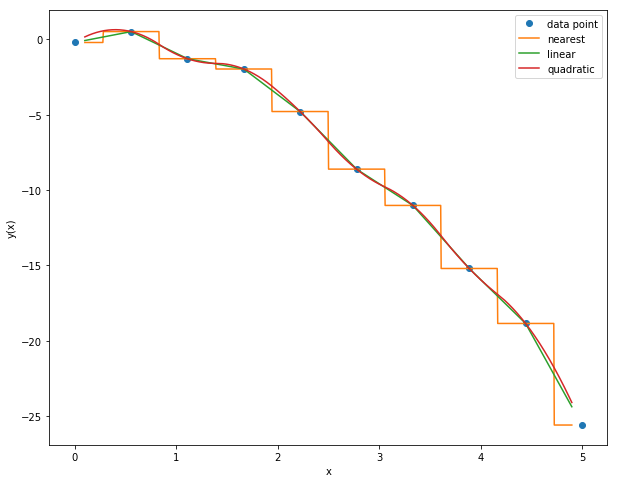

In [9]:
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt


def create_data(n):
    """Given an integer n, returns n data points
    x and values y as a numpy.array."""
    xmax = 5.
    x = np.linspace(0, xmax, n)
    y = - x**2
    #make x-data somewhat irregular
    y += 1.5 * np.random.normal(size=len(x))
    return x, y

#main program
n = 10
x, y = create_data(n)

#use finer and regular mesh for plot
xfine = np.linspace(0.1, 4.9, n * 100)
#interpolate with piecewise constant function (p=0)
y0 = scipy.interpolate.interp1d(x, y, kind='nearest')
#interpolate with piecewise linear func (p=1)
y1 = scipy.interpolate.interp1d(x, y, kind='linear')
#interpolate with piecewise quadratic func (p=2)
y2 = scipy.interpolate.interp1d(x, y, kind='quadratic')

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x, y, 'o', label='data point')
ax.plot(xfine, y0(xfine), label='nearest')
ax.plot(xfine, y1(xfine), label='linear')
ax.plot(xfine, y2(xfine), label='quadratic')
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
ax.legend()

Fit di una curva
-------------

Abbiamo già visto nel notebook su numpy (08_numpy) come fare un fit di un set di dati con un polinomio usando la funzione `numpy.polyfit`. Qui, introduciamo un algoritmo per fittare una curva con una funzione più generale.

Scipy fornisce una funzione piuttosto flessibile (basato sull'algoritmo di Levenburg-Marquardt), `scipy.optimize.curve_fit`, per interpolare un set di dati. L'assunzione è che vengano dati un set di punti
$x_1, x_2, …x_N$, i corrispondenti valori $y_i$ e una dipendenza funzionale $y=f(x,\vec{p})$.
Per fare un esempio, il numero di atomi non decaduti in un campione di una sostanza radioattiva segue la legge
$y(t) = N_0 \exp(\alpha t)$.
Si vuole determinare i parametri $\vec{p}=(p_1, p_2, \ldots,p_k)$ in modo che $r$, la somma degli scarti quadratici, sia la più piccola possibile:

$$r = \sum\limits_{i=1}^N \left(y_i - f(x_i, \vec{p})\right)^2$$

Questo approccio è particolarmente utile quando i dati sono affetti da *rumore*: per ogni coppia $x_i,y_i$ è presente un termine di errore (ignoto) $\epsilon_i$, tale che $y_i=f(x_i,\vec{p})+\epsilon_i$.

Un esempio per chiarire: assumiamo di avere dei dati che sappiamo essere descritti dalla funzione:
$$f(x,\vec{p}) = a \exp(-b x) + c,$$
che dipende dai parametri $\vec{p}=\mathtt{a,b,c}$, che devono essere determinati usando i dati.

Optimal parameters are a=2.55731, b=1.18219, and c=0.39926.


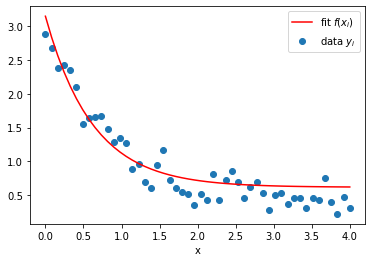

In [41]:
import numpy as np
from scipy.optimize import curve_fit


def f(x, a, b, c):
    """Fit function y=f(x,p) with parameters p=(a,b,c). """
    return a * np.exp(- b * x) + c

#create fake data
x = np.linspace(0, 4, 50)
y = f(x, a=2.5, b=1.3, c=0.5)
#add noise
yi = y + 0.2 * np.random.normal(size=len(x))

#call curve fit function
popt, pcov = curve_fit(f, x, yi)
a, b, c = popt
print(f"Optimal parameters are a={a:g}, b={b:g}, and c={c:g}.")

#plotting
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x, yi, marker='o', label='data $y_i$')
ax.plot(x, yfitted, c='r', label='fit $f(x_i)$')
ax.set_xlabel('x')
ax.legend()

Si noti che nell'esempio precedente abbiamo definito la funzione da utilizzare per il fit y = f(x)$ usando del codice Python. Quindi possiamo utilizzare una funzione (quasi) arbitraria nel metodo `curve_fit`.

La funzione `curve_fit` restituisce una tuple `popt, pcov`. Il primo elemento, `popt`, contiene l'ntupla dei parametri ottimali (OPTimal Parameters), cioè i parametri che minimizzano la somma degli scarti quadratici. Il secondo elemento contiene la matrice di covarianza di tutti i parametri (Sperimentazioni di Fisica). La diagonale fornisce la varianza della stima dei parametri.

L'algoritmo di Levenburg-Marquardt richiede, per iniziare la sua procedura, una stima iniziale dei parametri. Se questa non viene fornita, come nell'esempio precedente, il valore “1.0“ viene assunto come stima di partenza.

Se l'algoritmo non riesce a fittare i dati con la funzione ipotizzata, è necessario fornire a `curve_fit` una stima migliore per i parametri iniziali. Nell'esempio precedente potremmo passare le nostre stime cambiando la linea

```python
popt, pcov = curve_fit(f, x, yi)
```

in

```python
popt, pcov = curve_fit(f, x, yi, p0=(2,1,0.6))
```
se avessimo ragione di ritenere che *a* = 2, *b* = 1 and *c* = 0.6 siano dei valori "ragionevoli". Una volta che la stima iniziale è "più o meno corretta" il fit funziona bene. 

Ottimizzazione
------------

Spesso è necessario trovare il massimo o il minimo di una particolare funzione *f(x)* dove *f* è una funzione scalare mentre *x* può essere un vettore. Applicazioni tipiche sono la minimizzazione di quantità come il costo, il rischio o l'errore, oppure la massimizzazione della produttività, efficienza o profitto. Le routines di ottimizzazione tipicamente forniscono un metodo per minimizzare una funzione data: per massimizzare *f(x)* è sufficiente minimizzare *g(x)= − f(x)*.

Di seguito, un esempio che mostra (i) the definizione din funzione di test function e (ii) la chiamata a `scipy.optimize.fmin` a cui vengono passati la funzione *f* da minimizzare e un valore iniziale *x*<sub>0</sub> da cui partire per la ricerca del minimo, e che restituisce il valore *x* per cui *f(x)* ha un minimo locale. Tipicamente, la ricerca del minimo è locale, nel senso che l'algoritmo segue il gradiente (derivata multidimensionale) nel punto in cui si trova. Cerchiamo il minimo partendo da due punti diversi (*x*<sub>0</sub> = 1.0 e *x*<sub>0</sub> = 2.0, respectively) per dimostrare che, a seconda del punto di partenza, possiamo trovare minimi diversi della funzione *f*.

La maggior parte dei comandi, dopo le due chiamate a `fmin`, generano il plot della funzione, mostrando i punti iniziali delle due ricerche e i minimi ottenuti:

Optimization terminated successfully.
         Current function value: -2.023866
         Iterations: 16
         Function evaluations: 32
Start search at x=1., minimum is [0.23964844]
Optimization terminated successfully.
         Current function value: -1.000529
         Iterations: 16
         Function evaluations: 32
Start search at x=2., minimum is [3.13847656]


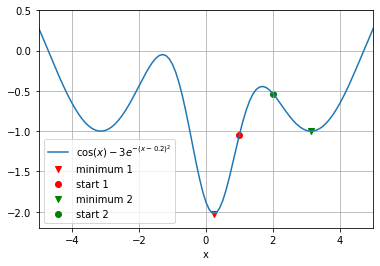

In [42]:
import numpy as np
from scipy.optimize import fmin
import matplotlib.pyplot as plt

def f(x):
    return np.cos(x) - 3 * np.exp( -(x - 0.2) ** 2)

# find minima of f(x),
# starting from 1.0 and 2.0 respectively
minimum1 = fmin(f, 1.0)
print("Start search at x=1., minimum is", minimum1)
minimum2 = fmin(f, 2.0)
print("Start search at x=2., minimum is", minimum2)

# plot function
x = np.arange(-10, 10, 0.1)
y = f(x)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_xlabel('x')
ax.grid(b=True,which='both')
ax.set_xlim(-5.,5.)
ax.set_ylim(-2.2,0.5)

ax.plot(x, y, label='$\cos(x)-3e^{-(x-0.2)^2}$')
# add minimum1 to plot
ax.scatter(minimum1, f(minimum1), marker='v', c='r', label='minimum 1')
# add start1 to plot
ax.scatter(1.0, f(1.0), marker='o', c='r', label='start 1')

# add minimum2 to plot
ax.scatter(minimum2,f(minimum2), marker='v', c='g', label='minimum 2')
# add start2 to plot
ax.scatter(2.0,f(2.0), marker='o', c='g',label='start 2')

ax.legend(loc='lower left')

Come si vede, la chiamata a `fmin` produce anche dell'output addizionale che può essere utile per analizzare la procedura.

##### Valori ritornati da `fmin`

Si noti che la funzione `fmin` restituisce un numpy `array` che – nel caso precedente – contiene un solo numero dal momento che abbiamo una sola variabile (qui *x*) da variare. In generale, `fmin` può essre usata per trovare il minimo in uno spazio pluridimensionale. In questo caso, il numpy array contiene le coordinate del punto che minimizza la funzione obiettivo.

Altri metodi numerici
-----------------------

Scientific Python and Numpy forniscono molti altri algoritmi numerici: per esempio interpolazione di funzioni, trasformate di Fourier, ottimizzazione, funzioni speciali (Funzioni di Bessel etc.), generazione di numeri casuali, signal processing e filtri.


Ulteriori informazioni ed esempi: [Scipy-lectures](http://scipy-lectures.org/index.html).